In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv', encoding='latin_1')
df.head()
df.shape

(5268, 13)

In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [4]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [5]:
#Handling the missing values
df['Ground'] = df['Ground'].fillna(0)
df['Aboard'] = df['Aboard'].fillna(df['Aboard'].median())
df['Fatalities'] = df['Fatalities'].fillna(df['Fatalities'].median())
df['Time'] = df['Time'].fillna('Unknown')
df['Route'] = df['Route'].fillna('Unknown')
df['Summary'] = df['Summary'].fillna("No Summary Available")
df['Location'] = df['Location'].fillna("Unknown")
df['Operator'] = df['Operator'].fillna("Unknown")
df['Type'] = df['Type'].fillna("Unknown")
df = df.drop('Flight #', axis=1)
df = df.drop('cn/In', axis=1)
df = df.drop('Registration', axis=1)
df.isnull().sum()


Date          0
Time          0
Location      0
Operator      0
Route         0
Type          0
Aboard        0
Fatalities    0
Ground        0
Summary       0
dtype: int64

In [6]:
#Handling Date field
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Aboard',
       'Fatalities', 'Ground', 'Summary', 'Year', 'Month'],
      dtype='object')

In [7]:
#Univariate Analysis
df['Aboard'].describe()

count    5268.000000
mean       27.493736
std        42.996900
min         0.000000
25%         5.000000
50%        13.000000
75%        30.000000
max       644.000000
Name: Aboard, dtype: float64

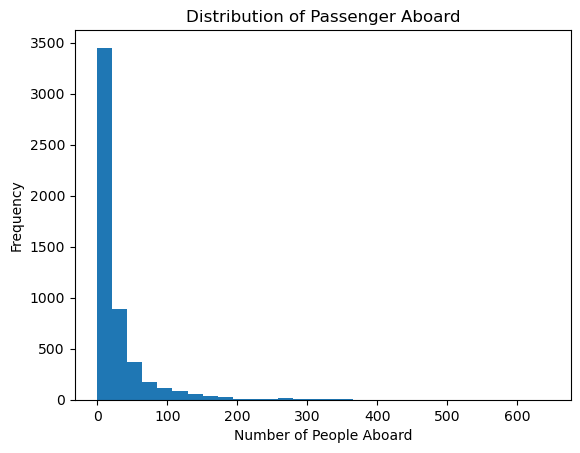

In [8]:
plt.hist(df['Aboard'], bins=30)
plt.title('Distribution of Passenger Aboard')
plt.xlabel('Number of People Aboard')
plt.ylabel('Frequency')
plt.show()

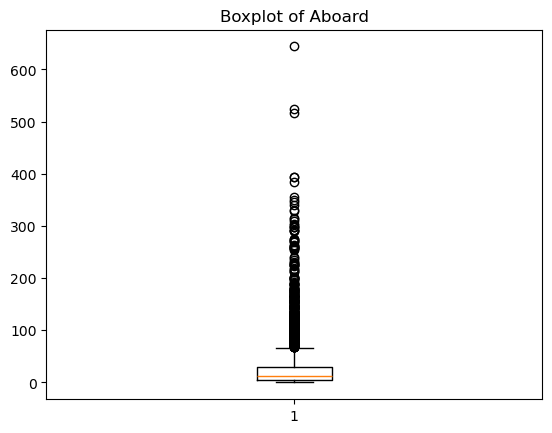

In [9]:
plt.boxplot(df['Aboard'])
plt.title("Boxplot of Aboard")
plt.show()

In [10]:
#Univariate for Fatalities
df['Fatalities'].describe()

count    5268.000000
mean       20.043090
std        33.166309
min         0.000000
25%         3.000000
50%         9.000000
75%        23.000000
max       583.000000
Name: Fatalities, dtype: float64

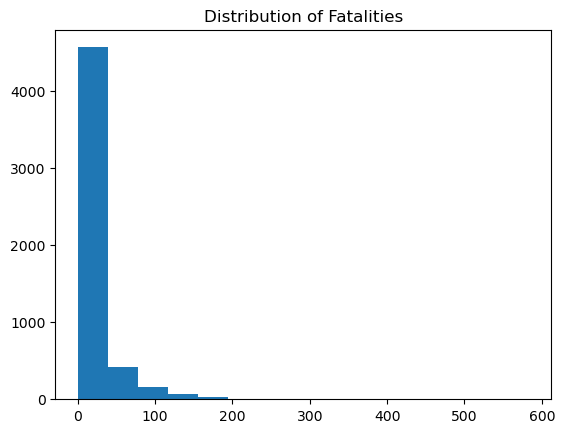

In [11]:
plt.hist(df['Fatalities'], bins=15)
plt.title('Distribution of Fatalities')
plt.show()

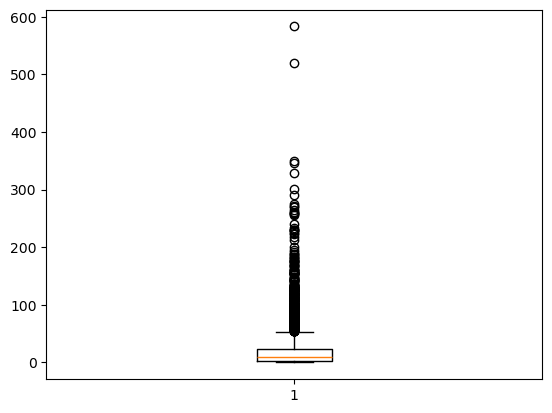

In [12]:
plt.boxplot(df['Fatalities'])
plt.show()

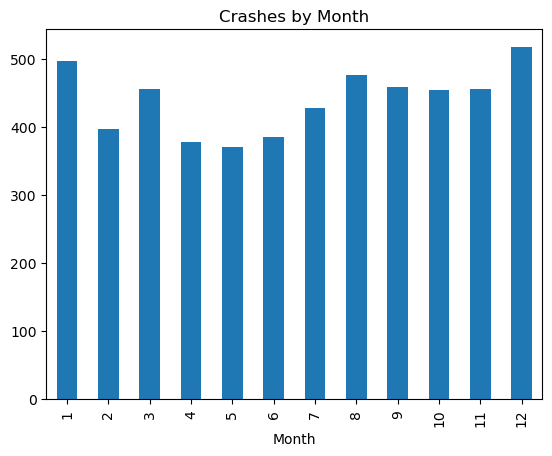

In [13]:
#Univariate on Month
df['Month'].value_counts().sort_index().plot(kind='bar')
plt.title('Crashes by Month')
plt.show()

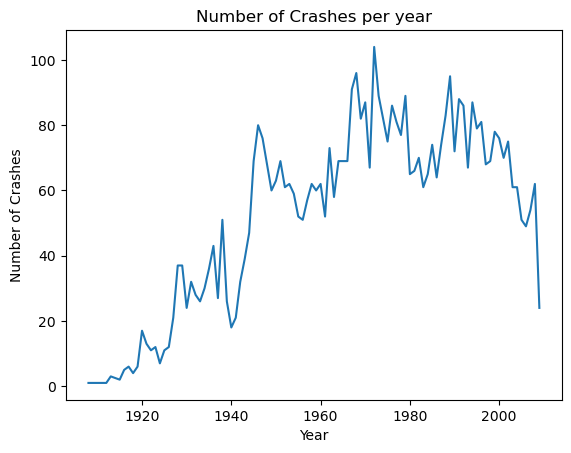

In [16]:
#Univariate Analysis on Crashes per Year
crashes_per_year = df.groupby('Year').size()
crashes_per_year.head()
average_crashes = crashes_per_year.mean()
crashes_per_year.plot(kind='line')
plt.title('Number of Crashes per year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

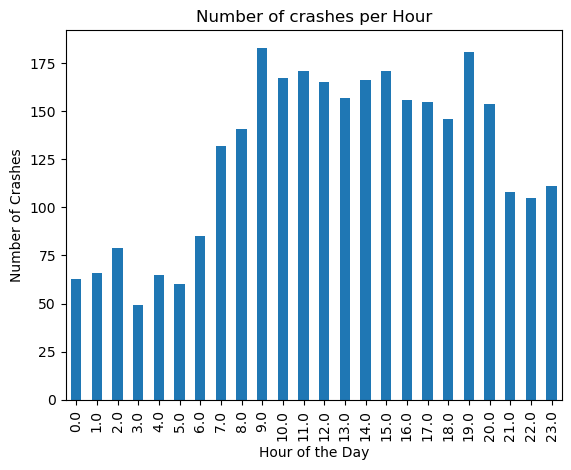

In [20]:
#Univariate analysis on Crashes per hour
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors = 'coerce')
df['Hour']=df['Time'].dt.hour
crashes_per_hour = df['Hour'].value_counts().sort_index()
crashes_per_hour.plot(kind='bar')
plt.title('Number of crashes per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.show()

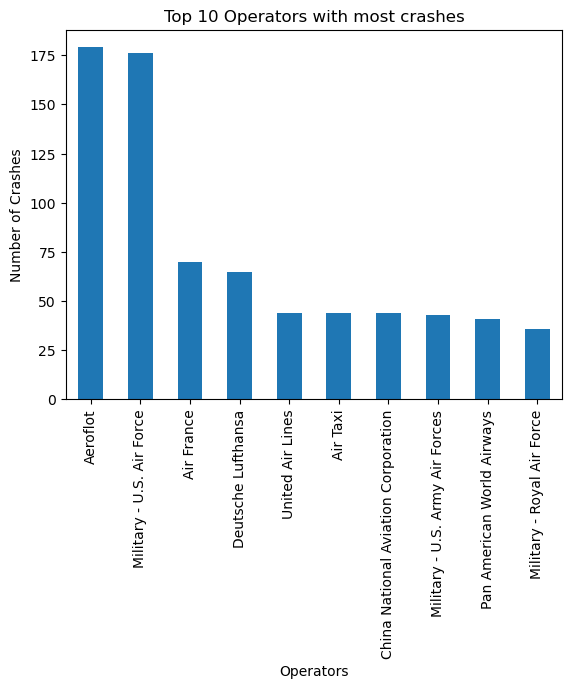

In [22]:
#Univariate on Crashes per operator
df['Operator'].value_counts().head(10).plot(kind = 'bar')
plt.title('Top 10 Operators with most crashes')
plt.xlabel('Operators')
plt.ylabel('Number of Crashes')
plt.show()

Year with most crashes: 1972
Number of crashes: 104


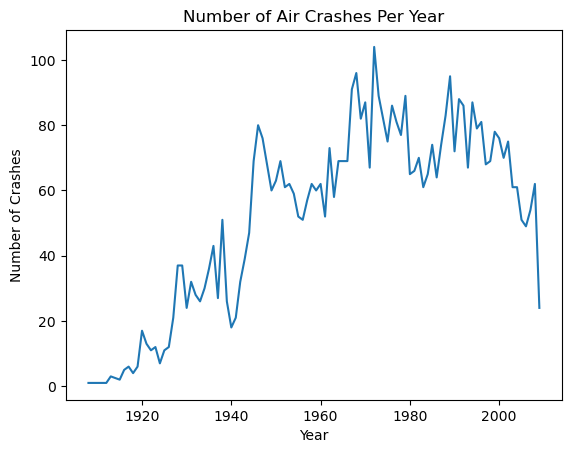

In [26]:
#Bivariate Analysis on year vs crashes
crashes_per_year = df.groupby('Year').size()
year_most_crashes = crashes_per_year.idxmax()
max_crashes = crashes_per_year.max()
print("Year with most crashes:", year_most_crashes)
print("Number of crashes:", max_crashes)
crashes_per_year.plot(kind = 'line')
plt.title('Number of Air Crashes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

In [28]:
""" The Year 1972 is having the highest number of air crashes. The Air crashes peaked in the early 1970s.
In the 1990s there is downward trend. This suggests that aviation safety improved significantly """ 

' The Year 1972 is having the highest number of air crashes. The Air crashes peaked in the early 1970s.\nIn the 1990s there is downward trend. This suggests that aviation safety improved significantly '

Country with Most Air Crashes:
Brazil
Number of Crashes: 189


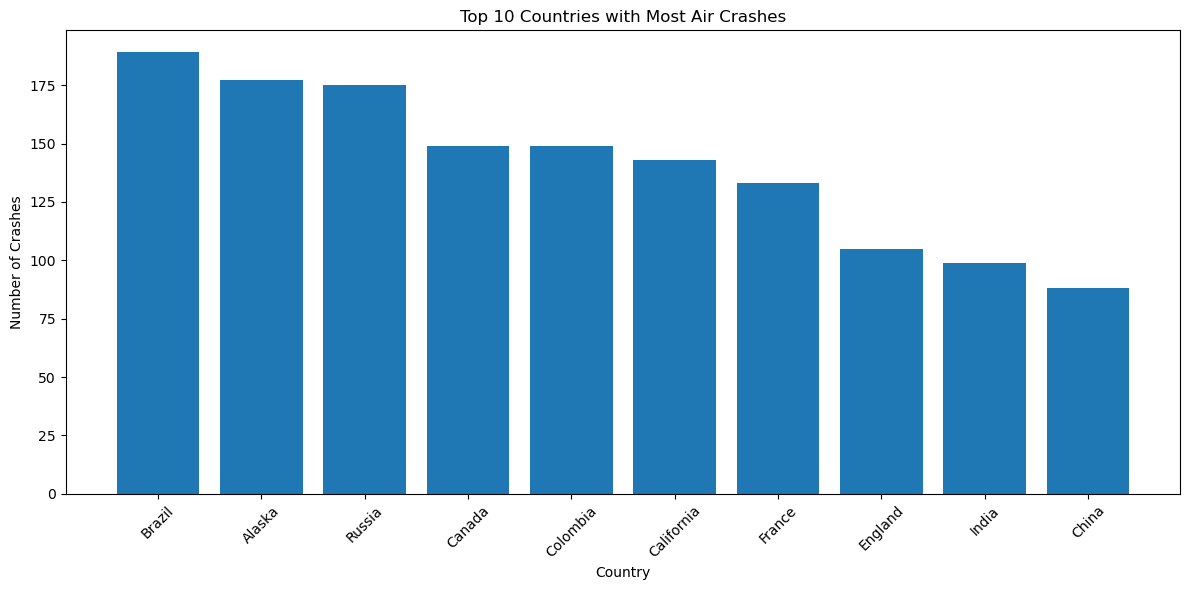

In [31]:
#Univriate analysis on the Country which reported most air crashes
df.loc[:,'Country'] = df['Location'].astype(str).apply(lambda x: x.split(',')[-1].strip())
df = df[df['Country'] != 'Unknown']
country_counts = df['Country'].value_counts()
top_country = country_counts.idxmax()
top_crashes = country_counts.max()
print("Country with Most Air Crashes:")
print(top_country)
print("Number of Crashes:", top_crashes)
top10 = country_counts.head(10)
plt.figure(figsize=(12,6))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Crashes")
plt.title("Top 10 Countries with Most Air Crashes")
plt.tight_layout()
plt.show()

Country with Highest Fatalities (1908–2009):
Russia
Total Fatalities: 6662


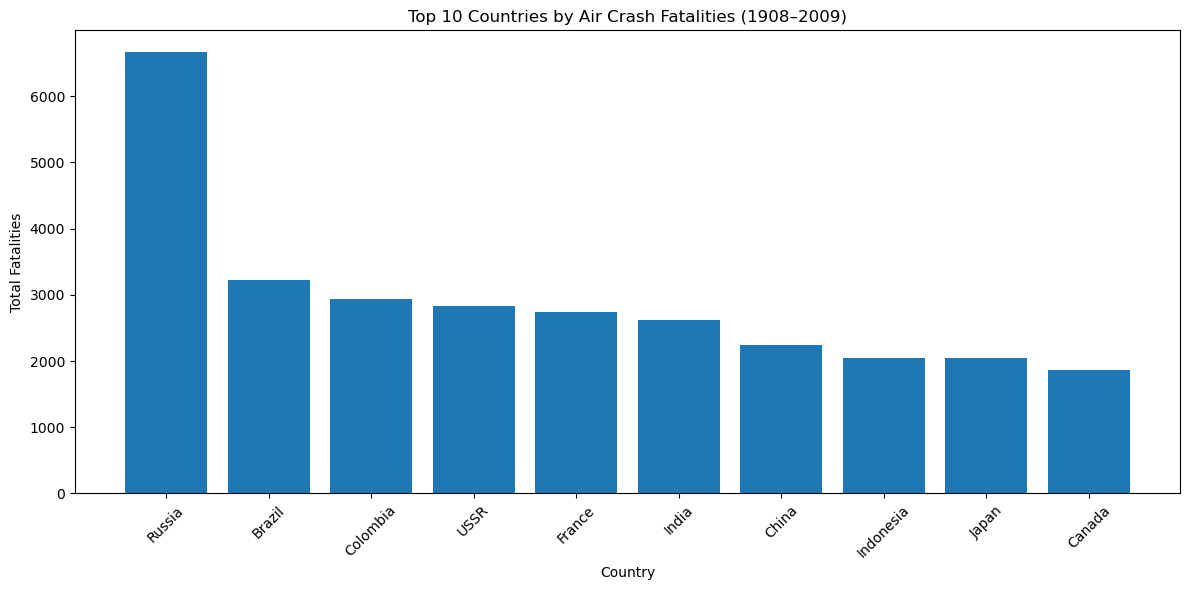

In [33]:
#Bivariate Analysis on country has reported the most fatilities
fatalities_by_country = df.groupby('Country')['Fatalities'].sum().sort_values(ascending=False)
top_country = fatalities_by_country.idxmax()
top_fatalities = fatalities_by_country.max()
print("Country with Highest Fatalities (1908–2009):")
print(top_country)
print("Total Fatalities:", int(top_fatalities))
top10 = fatalities_by_country.head(10)

plt.figure(figsize=(12,6))
plt.bar(top10.index, top10.values)

plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Total Fatalities")
plt.title("Top 10 Countries by Air Crash Fatalities (1908–2009)")

plt.tight_layout()
plt.show()


Total People Aboard: 144577
Total Fatalities: 105387
Total Survivors: 39190

Fatality Rate: 72.89%
Survival Rate: 27.11%


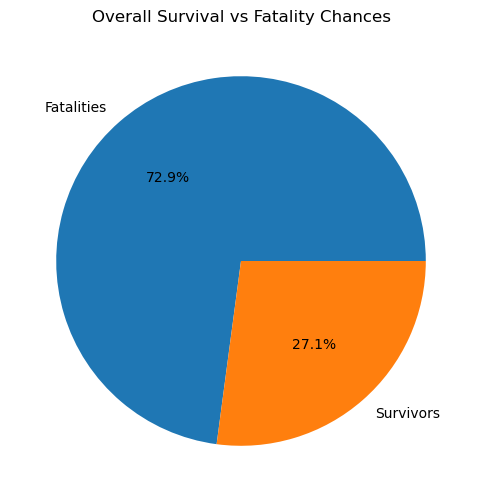

In [35]:
#Bivariate Analysis on how much survival and fatality chances in air crashes
total_aboard = df['Aboard'].sum()
total_fatalities=df['Fatalities'].sum()
total_survivors = total_aborad - total_fatalities
fatality_rate = (total_fatalities / total_aboard) * 100
survival_rate = (total_survivors / total_aboard) * 100
print("Total People Aboard:", int(total_aboard))
print("Total Fatalities:", int(total_fatalities))
print("Total Survivors:", int(total_survivors))
print("\nFatality Rate: {:.2f}%".format(fatality_rate))
print("Survival Rate: {:.2f}%".format(survival_rate))
labels = ['Fatalities', 'Survivors']
sizes = [total_fatalities, total_survivors]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Overall Survival vs Fatality Chances")
plt.show()

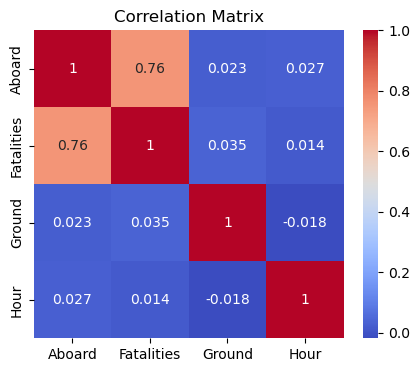

In [36]:
#Correlation Analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlation Matrix")
plt.show()

In [37]:
'''Correlation analysis shows a strong positive relationship (0.76) between Aboard and Fatalities, indicating that accidents involving more passengers tend to result in higher fatalities. Other variables such as Ground fatalities and Hour show very weak correlations, suggesting minimal linear relationships.'''

'Correlation analysis shows a strong positive relationship (0.76) between Aboard and Fatalities, indicating that accidents involving more passengers tend to result in higher fatalities. Other variables such as Ground fatalities and Hour show very weak correlations, suggesting minimal linear relationships.'

In [40]:
df.columns

496

In [44]:
#Encoding
df_crash = df.copy()
df_crash_encoded = df_crash.copy()
df_crash_encoded = df_crash_encoded.drop(['Date','Time','Location','Route','Summary'], axis=1)
#Frequency Encoding
operator_freq = df_crash_encoded['Operator'].value_counts()
df_crash_encoded['Operator'] = df_crash_encoded['Operator'].map(operator_freq)
type_freq = df_crash_encoded['Type'].value_counts()
df_crash_encoded['Type'] = df_crash_encoded['Type'].map(type_freq)
country_freq = df_crash_encoded['Country'].value_counts()
df_crash_encoded['Country'] = df_crash_encoded['Country'].map(country_freq)
#Handle Missing Hour
df_crash_encoded['Hour'] = df_crash_encoded['Hour'].fillna(df_crash_encoded['Hour'].median())
bool_cols = df_crash_encoded.select_dtypes(include='bool').columns
df_crash_encoded[bool_cols] = df_crash_encoded[bool_cols].astype(int)

print(df_crash_encoded.head())
print(df_crash_encoded.shape)
print(df_crash_encoded.dtypes)

   Operator  Type  Aboard  Fatalities  Ground  Year  Month  Hour  Country
0        23     1     2.0         1.0     0.0  1908      9  17.0       24
1        36     1     5.0         5.0     0.0  1912      7   6.0       40
2        31     1     1.0         1.0     0.0  1913      8  13.0      149
3        15     1    20.0        14.0     0.0  1913      9  18.0        1
4        15     1    30.0        30.0     0.0  1913     10  10.0       79
(5248, 9)
Operator        int64
Type            int64
Aboard        float64
Fatalities    float64
Ground        float64
Year            int32
Month           int32
Hour          float64
Country         int64
dtype: object
